<a href="https://colab.research.google.com/github/anishjohnson/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Anish_johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

.

## **Import the required libraries and data.**

In [2]:
# Import the libraries that will be used.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data by mounting the google drive.
from google.colab import drive
drive.mount('/content/drive')

# Load the data
airbnb_data = pd.read_csv('/content/drive/MyDrive/Capstone data files/Airbnb NYC 2019.csv')

Mounted at /content/drive


In [4]:
# First look at our data.
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


> ***Well the dataframe contains numerical as well as categorical features!***

> ***But how many of these features are categorical and how many are numerical?, and what about the number of rows and columns?***

> ***And does the data contain any null values?***

> ***Lets find out...🔍***



In [5]:
# Find out the shape of our data.
airbnb_data.shape

(48895, 16)

In [6]:
# Lets get some info regarding this data.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Check for null values.
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*From the above observation we can see:*
1. *There are **48895 Rows** and **16 Columns**,*
2. *Out of which **10 are numerical** and **6 are categorical** fetures.*
3. *There are few columns with null values present in them which needs to be removed.*

In [8]:
# Droping the null values.
airbnb_data.dropna(inplace=True)

In [9]:
# Recheck the shape.
airbnb_data.shape

(38821, 16)

In [10]:
airbnb_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

***Good!! now that we have dropped the null values lets take a look at some statistics about our data.***

In [11]:
# Describe our data.
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*Ooops!!🤔*
> *The above table shows that the minimum_nights stayed is 1 and the minimum price payed is 0$, which is impossible unless Airbnb plans to provide rooms free of cost.* 

> *Which indirectly means that there exist few rows in which the value for minimum_nights is 1 and the respective rent(price) paid is 0.*

> *Inorder to solve this we will have to replace these rows with the average of the minimum prices paid for 1 night multiplied by the total nights stayed, i.e **[price = avg(min_prices)x(total_nights_stayed)]**, therefore lets assume that the minimum prices to be paid for 1 night ranges between (0-100) and get an average of all the prices less than 100$.*



In [12]:
# Lets make a copy of our dataset before making any changes.
airbnb_data_copy = airbnb_data.copy()

In [13]:
# First get the columns with price = 0.
airbnb_data_copy[airbnb_data_copy['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [14]:
# Second get the average of minimum prices paid.
min_avg_price = round(airbnb_data_copy.loc[airbnb_data_copy['price'] < 100, 'price'].mean())
min_avg_price

65

In [15]:
# Third replace the price = 0 with min_avg_price.
airbnb_data_copy['price'] = np.where((airbnb_data_copy['price'] == 0),
                                     (min_avg_price*airbnb_data_copy['minimum_nights']),
                                     airbnb_data_copy['price'])

In [16]:
# Finally check if the prices have been replaced or not.
airbnb_data_copy[airbnb_data_copy['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


***Yuhooo!! 😊 we have successfull replaced the rows with price = 0.***

***Lets get the statistics again.📄***

In [17]:
airbnb_data_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.463126,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,197.412608,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


.

***Now lets bring in the charts and diagrams to understand our data better.📈📉📊***

# ***EDA:***

In [18]:
# Start by getting the numeric and categorical features.
numeric_features = airbnb_data_copy.describe().columns

categorical_fetures = airbnb_data_copy.describe(exclude=[int, float]).columns

print('Numeric Features:',list(numeric_features))
print('_'*185)
print('Categorical Features:',list(categorical_fetures))

Numeric Features: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
_________________________________________________________________________________________________________________________________________________________________________________________
Categorical Features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


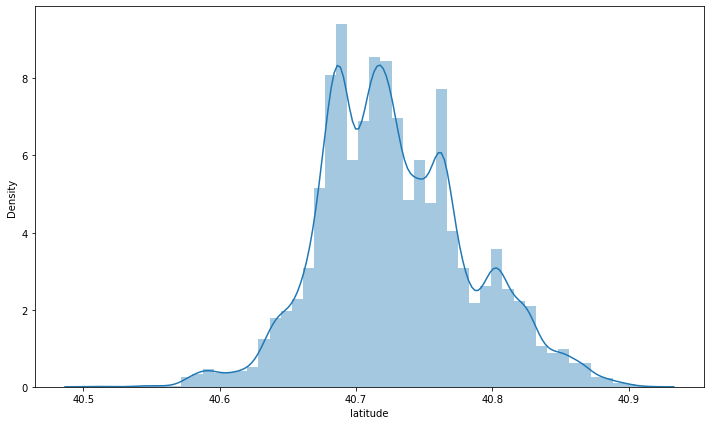

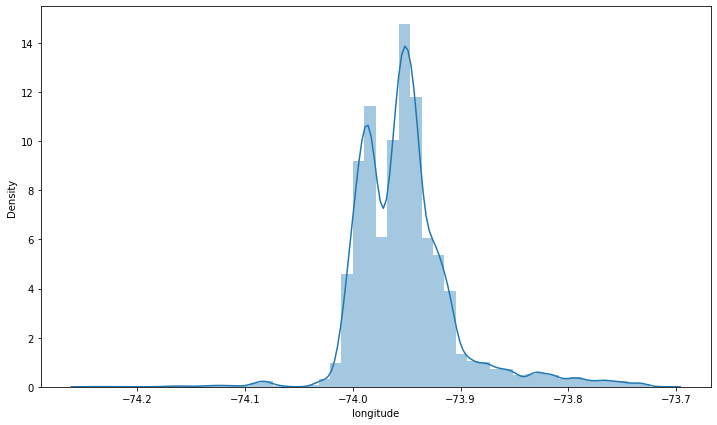

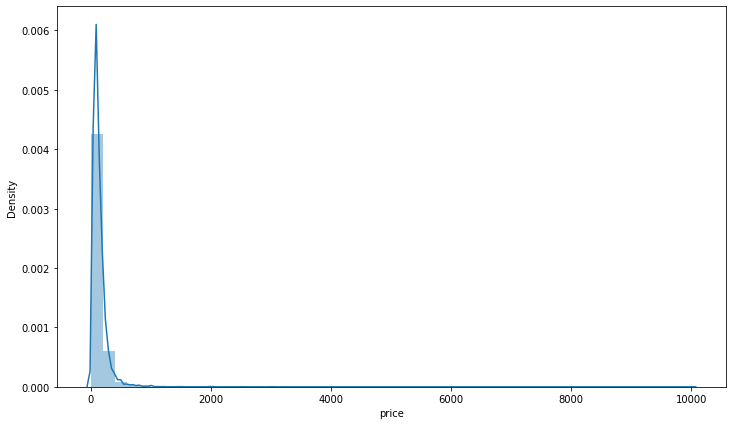

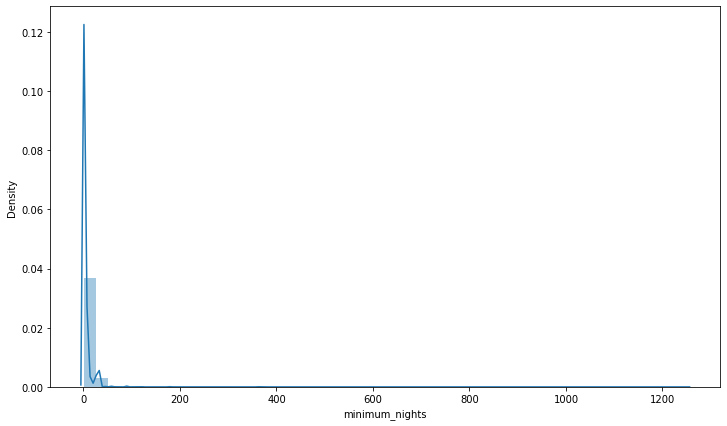

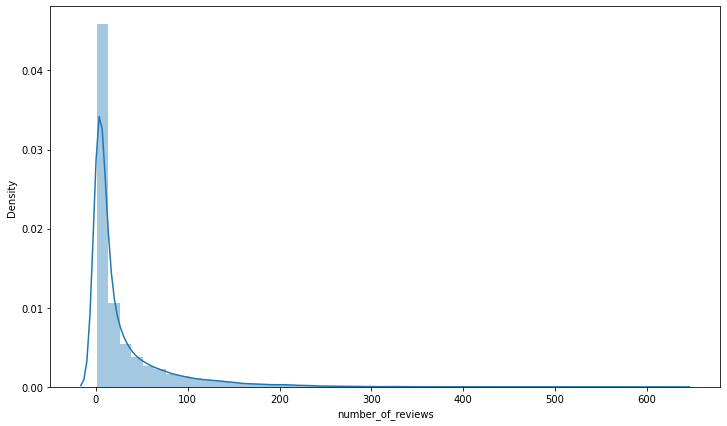

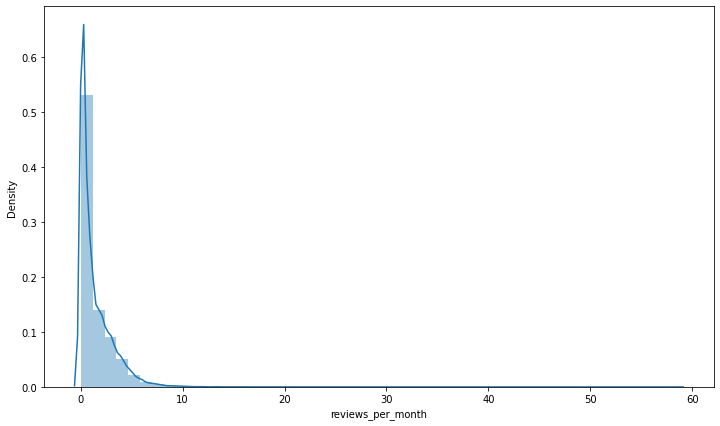

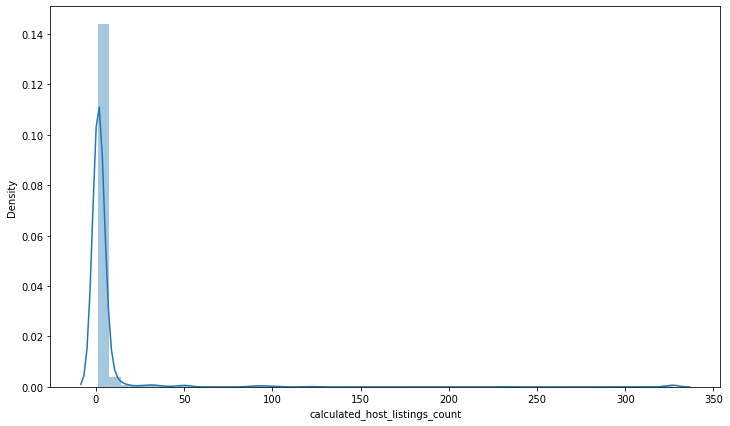

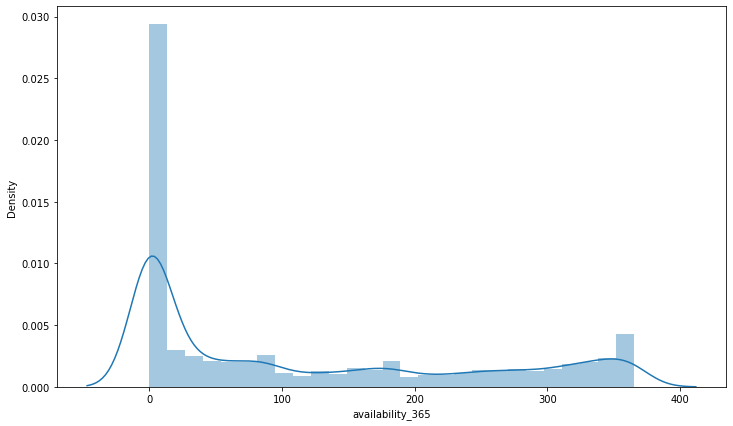

In [20]:
# Lets have a look at the distributions of our numeric_features.

for i in numeric_features[2:]:  # Exclude id & host_id as they contain high cardinality
  feature = airbnb_data_copy[i]
  sns.distplot(feature)
  plt.show()

.

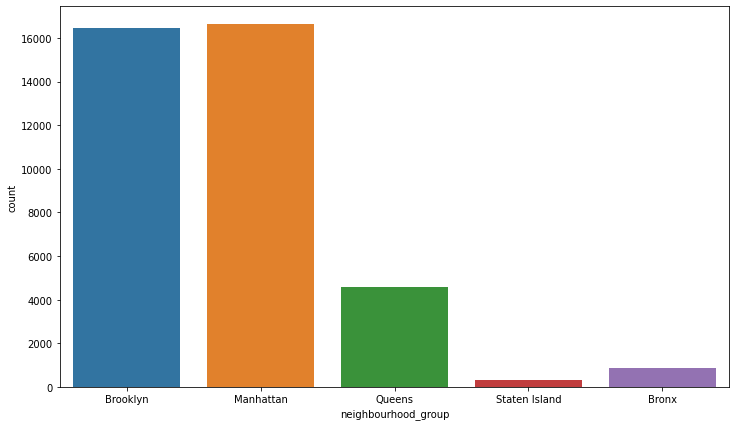

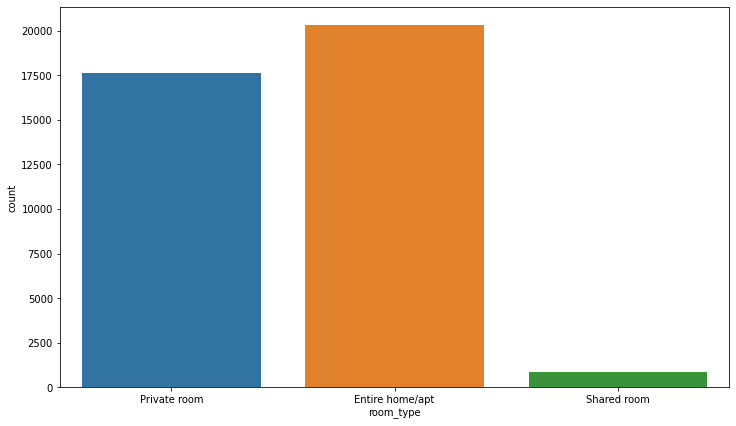

In [28]:
# Checkout few categorical features. (exclude 'name', 'host_name', 'last_review', 'neighbourhood' as these type of data contain high cardinality)

for i in categorical_fetures[2:5:2]:  
  feature = airbnb_data_copy[i]
  sns.countplot(x=feature)
  plt.show()

In [32]:
# Get the one-hot-encoding done for the above two categorical features.
airbnb_data_copy = pd.get_dummies(airbnb_data_copy, columns=['neighbourhood_group', 'room_type'])

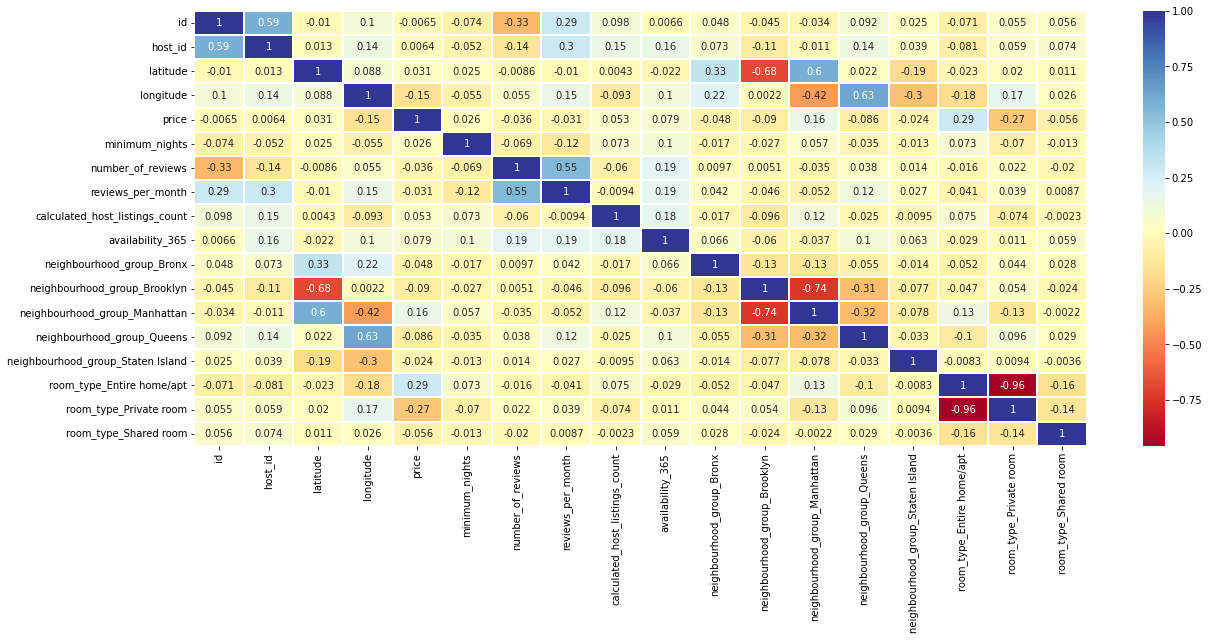

In [37]:
# Now lets check for multicolinearity.
correlation = airbnb_data_copy.corr()
fig = plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True, linewidths=1, cmap='RdYlBu')

In [94]:
df = airbnb_data_copy[numeric_features[2:]]

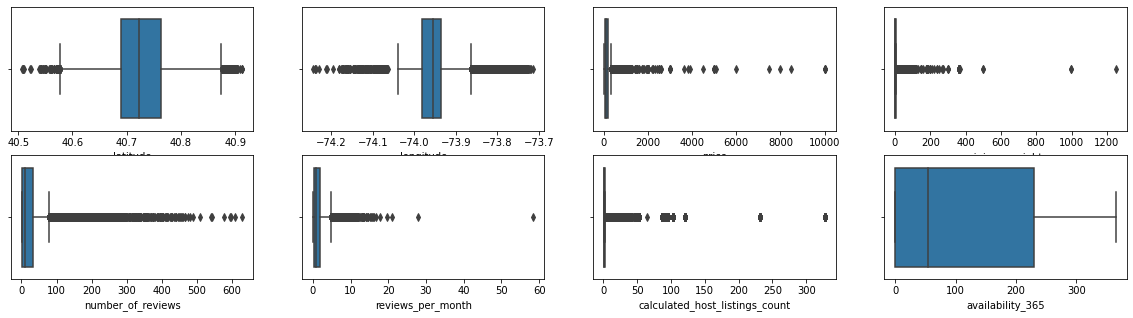

In [90]:
names = df.columns
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
# fig = plt.figure(figsize=(50,5))

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x=name, data=df, ax=ax)
    
plt.show()

***Now what stories do these charts & diagrams tell us.....lets see👀***